### try FFT 

https://www.datacamp.com/community/tutorials/xgboost-in-python

In [1]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
os.environ["PATH"] += os.pathsep + 'D:/LatexPackage/miktex/bin/x64'

In [2]:
os.environ["PATH"] += os.pathsep + 'D:/Database/Bitfinex-historical-data-master/Bitfinex-historical-data-master'

In [3]:
import warnings
warnings.filterwarnings("ignore")


In [4]:
from sklearn.datasets import load_boston

In [5]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [6]:
import numpy as np

import matplotlib.pyplot as plt

import datetime as dt

from datetime import datetime

import pandas as pd
import urllib.request
     

from IPython.display import clear_output

In [7]:
## Loading BTC and XRP Data

In [8]:
header_format = ['timestamp_UTC_millisec',
'open_price',
'close_price',
'highest_price',
'lowest_price',
'volume']

In [9]:
BTC_USD_1min_path = 'D:\Database\Bitfinex-historical-data-master_backup\Bitfinex-historical-data-master\BTCUSD\Candles_1m'

In [12]:
XRP_USD_1min_path = 'D:\Database\Bitfinex-historical-data-master_backup\Bitfinex-historical-data-master\XRPUSD\Candles_1m'

In [10]:
BTC_2019 = pd.read_csv(BTC_USD_1min_path + '/2019/merged.csv', header=None ,names =  ['btc_' + d for d in header_format])

In [11]:
BTC_2018 = pd.read_csv(BTC_USD_1min_path + '/2018/merged.csv', header=None ,names =  ['btc_' + d for d in header_format])

In [13]:
XRP_2018 = pd.read_csv(XRP_USD_1min_path + '/2018/merged.csv', header=None, names = ['xrp_' + d for d in header_format])

In [14]:
XRP_2019 = pd.read_csv(XRP_USD_1min_path + '/2019/merged.csv', header=None , names =  ['xrp_' + d for d in header_format])

In [15]:
btc_xrp_merged_2019 = BTC_2019.merge(XRP_2019, 
               left_on = 'btc_timestamp_UTC_millisec', 
               right_on = 'xrp_timestamp_UTC_millisec', 
               how = 'outer')

In [16]:
btc_xrp_merged_2019['time_stamp_UTC_millisec'] = btc_xrp_merged_2019['xrp_timestamp_UTC_millisec']

In [17]:
btc_xrp_merged_2019['time_stamp_UTC_millisec'] = btc_xrp_merged_2019['time_stamp_UTC_millisec'].fillna(btc_xrp_merged_2019['btc_timestamp_UTC_millisec'])

In [18]:
btc_xrp_merged_2019.tail()

,btc_timestamp_UTC_millisec,btc_open_price,btc_close_price,btc_highest_price,btc_lowest_price,btc_volume,xrp_timestamp_UTC_millisec,xrp_open_price,xrp_close_price,xrp_highest_price,xrp_lowest_price,xrp_volume,time_stamp_UTC_millisec
435091,NaN,NaN,NaN,NaN,NaN,NaN,1.572598e+12,0.29248,0.29254,0.29254,0.29243,35279.507174,1.572598e+12
435092,NaN,NaN,NaN,NaN,NaN,NaN,1.572601e+12,0.29166,0.29165,0.29166,0.29165,388.265000,1.572601e+12
435093,NaN,NaN,NaN,NaN,NaN,NaN,1.572601e+12,0.29189,0.29189,0.29189,0.29183,2000.000000,1.572601e+12
435094,NaN,NaN,NaN,NaN,NaN,NaN,1.572603e+12,0.29201,0.29201,0.29201,0.29201,100.000000,1.572603e+12
435095,NaN,NaN,NaN,NaN,NaN,NaN,1.572605e+12,0.29211,0.29211,0.29211,0.29211,834.642329,1.572605e+12


# Starting of analysis

### Get 1min XRP data

In [19]:
header_format = ['timestamp_UTC_millisec',
'open_price',
'close_price',
'highest_price',
'lowest_price',
'volume']

In [20]:
xrp_2018_full = pd.read_csv(XRP_USD_1min_path + '/2018/merged.csv', header=None)

In [21]:
xrp_2019_until_Oct = pd.read_csv(XRP_USD_1min_path + '/2019/merged.csv', header=None)

In [22]:
xrp_2018_full.columns = header_format

In [23]:
xrp_2019_until_Oct.columns = header_format

In [24]:
xrp_2018_onwards = pd.concat([xrp_2018_full, xrp_2019_until_Oct])

In [25]:
XRP_Data = xrp_2018_onwards[xrp_2018_onwards['timestamp_UTC_millisec'] >= 1534287600000]

In [26]:
XRP_Data['datetime_real'] = XRP_Data['timestamp_UTC_millisec'].apply(lambda x: datetime.utcfromtimestamp(x/1000))

In [27]:
len(XRP_Data)

564561

In [28]:
XRP_Data['datetime_real'].min()

Timestamp('2018-08-14 23:00:00')

In [29]:
XRP_Data['datetime_real'].max()

Timestamp('2019-11-01 15:59:00')

In [30]:
(XRP_Data['datetime_real'].max() - XRP_Data['datetime_real'].min())

Timedelta('443 days 16:59:00')

In [31]:
XRP_Data['checking_timestamp_UTC_millisec'] = XRP_Data['timestamp_UTC_millisec'].shift(-1)

In [32]:
XRP_Data['dif'] = XRP_Data['checking_timestamp_UTC_millisec'] - XRP_Data['timestamp_UTC_millisec']

In [33]:
XRP_Data_resample_1min_ffill = XRP_Data.set_index('datetime_real').resample('1T').ffill()

In [34]:
XRP_Data_resample_1min_ffill['checking_timestamp_UTC_millisec'] = XRP_Data_resample_1min_ffill['timestamp_UTC_millisec'].shift(-1)

In [35]:
XRP_Data_resample_1min_ffill['dif'] = XRP_Data_resample_1min_ffill['checking_timestamp_UTC_millisec'] - XRP_Data_resample_1min_ffill['timestamp_UTC_millisec']

In [36]:
XRP_Data_resample_1min_ffill['timestamp_UTC'] = XRP_Data_resample_1min_ffill['timestamp_UTC_millisec']/1000

In [37]:
XRP_Data_resample_1min_ffill.head()

,timestamp_UTC_millisec,open_price,close_price,highest_price,lowest_price,volume,checking_timestamp_UTC_millisec,dif,timestamp_UTC
datetime_real,,,,,,,,,
2018-08-14 23:00:00,1534287600000,0.26444,0.26427,0.26448,0.26427,21493.134691,1.534288e+12,60000.0,1.534288e+09
2018-08-14 23:01:00,1534287660000,0.26410,0.26408,0.26418,0.26408,6316.950507,1.534288e+12,60000.0,1.534288e+09
2018-08-14 23:02:00,1534287720000,0.26419,0.26429,0.26429,0.26390,15876.859198,1.534288e+12,60000.0,1.534288e+09
2018-08-14 23:03:00,1534287780000,0.26389,0.26359,0.26389,0.26359,15102.000000,1.534288e+12,60000.0,1.534288e+09
2018-08-14 23:04:00,1534287840000,0.26368,0.26359,0.26379,0.26359,6305.473357,1.534288e+12,60000.0,1.534288e+09


#### rough check on data

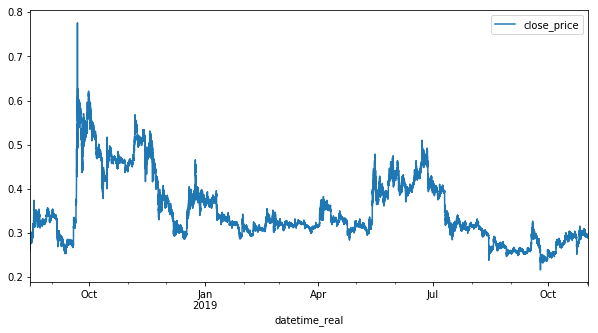

In [38]:
XRP_Data_resample_1min_ffill[['close_price']].plot(figsize = (10,5))

In [57]:
XRP_Data_resample_1min_ffill.tail(10)

,timestamp_UTC_millisec,open_price,close_price,highest_price,lowest_price,volume,checking_timestamp_UTC_millisec,dif,timestamp_UTC
datetime_real,,,,,,,,,
2019-11-01 15:50:00,1572623400000,0.29032,0.29029,0.29032,0.29029,18977.229740,1.572623e+12,60000.0,1.572623e+09
2019-11-01 15:51:00,1572623460000,0.29034,0.29030,0.29035,0.29030,11583.433064,1.572624e+12,60000.0,1.572623e+09
2019-11-01 15:52:00,1572623520000,0.29070,0.29046,0.29071,0.29046,205.000000,1.572624e+12,60000.0,1.572624e+09
2019-11-01 15:53:00,1572623580000,0.29058,0.29077,0.29077,0.29046,20164.038042,1.572624e+12,0.0,1.572624e+09
2019-11-01 15:54:00,1572623580000,0.29058,0.29077,0.29077,0.29046,20164.038042,1.572624e+12,120000.0,1.572624e+09
2019-11-01 15:55:00,1572623700000,0.29083,0.29173,0.29173,0.29083,1570.393827,1.572624e+12,60000.0,1.572624e+09
2019-11-01 15:56:00,1572623760000,0.29161,0.29150,0.29161,0.29120,4022.034331,1.572624e+12,60000.0,1.572624e+09
2019-11-01 15:57:00,1572623820000,0.29180,0.29154,0.29207,0.29154,6854.915950,1.572624e+12,60000.0,1.572624e+09
2019-11-01 15:58:00,1572623880000,0.29139,0.29030,0.29151,0.29030,8296.541362,1.572624e+12,60000.0,1.572624e+09



 selecting '2018-08-15 00:00:00' as the starting time as it bypasses the past crypto rush


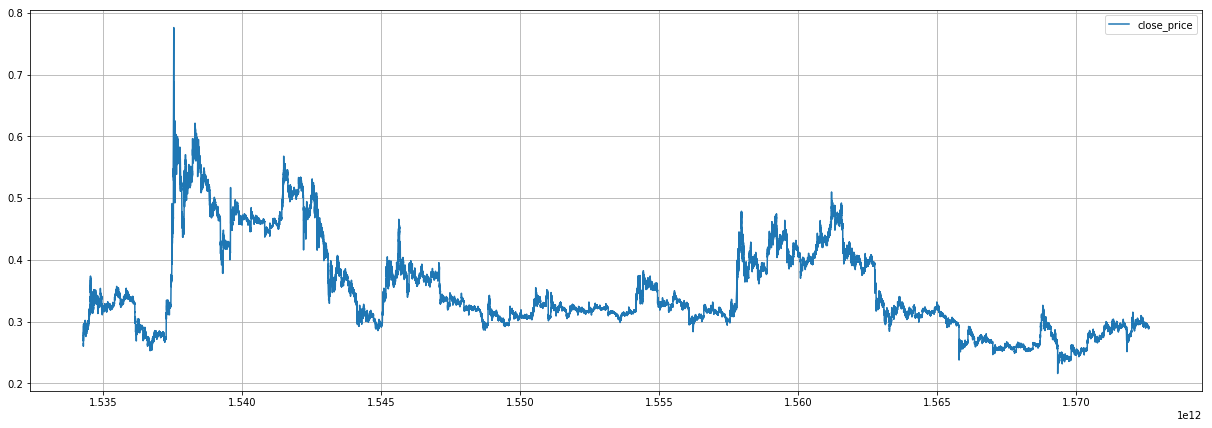

In [39]:
ploting_breakdown = XRP_Data_resample_1min_ffill.reset_index()

plt.figure(figsize= (21,7))


# tran_y_low = ploting_breakdown['low']
# tran_y_high = ploting_breakdown['high']
tran_y_close = ploting_breakdown['close_price']

tran_x = ploting_breakdown['timestamp_UTC_millisec']


# plt.plot(tran_x, tran_y_low, alpha = 0.1)
# plt.plot(tran_x, tran_y_high , alpha  = 0.1)

plt.plot(tran_x, tran_y_close, alpha  = 1)


# start = 45000
# dealta_t = 10000
time_section = {45000 : 13000,
                63000 : 8000 ,
                71000 : 10000,
                180000: 10000}  # start // delta_t



# plt.vlines(1534287600000, 0, 1, alpha = 1, color = 'g',linestyle = 'dashed')
    
plt.legend()
plt.grid()
print("\n selecting '2018-08-15 00:00:00' as the starting time as it bypasses the past crypto rush")

In [59]:
ploting_breakdown[ploting_breakdown['datetime_real'] == '2018-08-15 00:00:00']

,datetime_real,timestamp_UTC_millisec,open_price,close_price,highest_price,lowest_price,volume,checking_timestamp_UTC_millisec,dif,timestamp_UTC
60,2018-08-15,1534291200000,0.27279,0.2734,0.27349,0.27279,17252.63782,1.534291e+12,60000.0,1.534291e+09


In [60]:
ploting_breakdown[ploting_breakdown['datetime_real'] == '2019-08-15 00:00:00']

,datetime_real,timestamp_UTC_millisec,open_price,close_price,highest_price,lowest_price,volume,checking_timestamp_UTC_millisec,dif,timestamp_UTC
525660,2019-08-15,1565827200000,0.26373,0.26559,0.26559,0.26363,166192.961293,1.565827e+12,60000.0,1.565827e+09


## Saving Data 

In [63]:
# XRP_Data_backUp = XRP_Data_resample_1min_ffill.copy()

## Copy for testing

In [64]:
XRP_for_training =XRP_Data_resample_1min_ffill[(XRP_Data_resample_1min_ffill['timestamp_UTC'] >= 1534287600) &
                           (XRP_Data_resample_1min_ffill['timestamp_UTC'] <1565823600)].reset_index().copy()

In [65]:
XRP_for_testing =XRP_Data_resample_1min_ffill[(XRP_Data_resample_1min_ffill['timestamp_UTC'] >= 1565823600)].reset_index().copy()